# **Objective of this dataset is to help fertilizer predection**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
data_fertilizer = pd.read_csv('/content/Fertilizer Prediction.csv')

In [ ]:
data_fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea
2,27,55,43,Sandy,Sugarcane,28,0,17,20-20
3,33,56,56,Loamy,Ground Nuts,37,5,24,28-28
4,32,70,60,Red,Ground Nuts,4,6,9,14-35-14


In [ ]:
data_fertilizer.shape


(100000, 9)

In [ ]:
data_fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      100000 non-null  int64 
 1   Humidity         100000 non-null  int64 
 2   Moisture         100000 non-null  int64 
 3   Soil Type        100000 non-null  object
 4   Crop Type        100000 non-null  object
 5   Nitrogen         100000 non-null  int64 
 6   Potassium        100000 non-null  int64 
 7   Phosphorous      100000 non-null  int64 
 8   Fertilizer Name  100000 non-null  object
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


In [ ]:
data_fertilizer.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


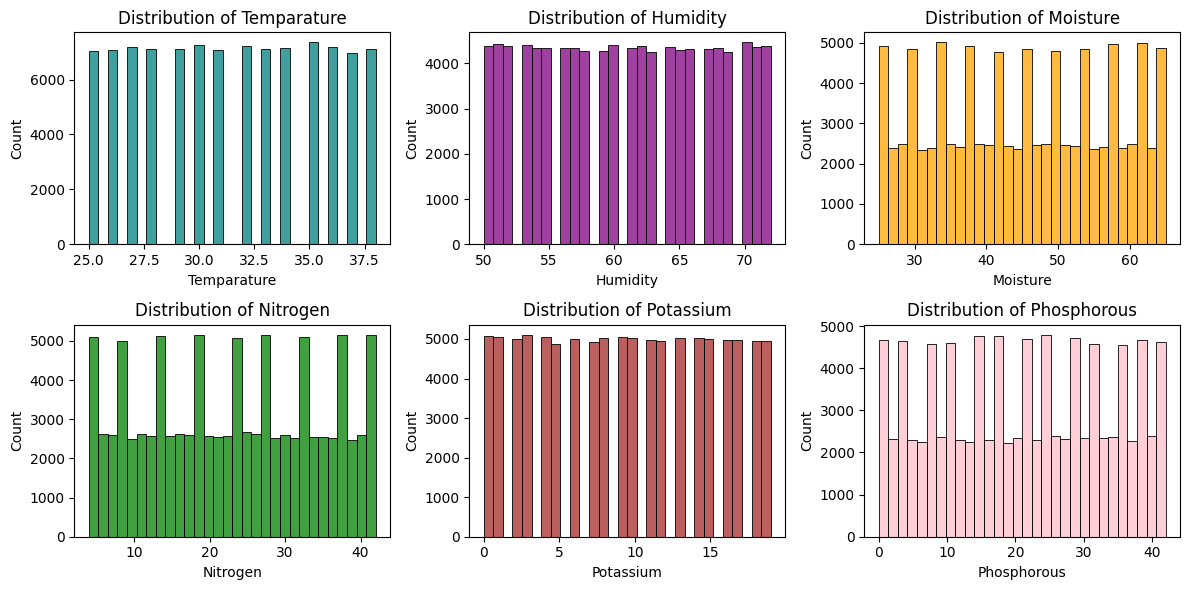

In [ ]:


# Select numerical columns
numerical_cols = data_fertilizer.select_dtypes(include=['int64', 'float64']).columns

# List of colors (can add more colors if needed)
colors = ["teal",  "purple", "orange","green", 'brown', 'pink', 'gray']

# Create subplots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)

    # Use a different color from the list for each column
    sns.histplot(data_fertilizer[col], bins=30, color=colors[i-1])  # Color changes for each graph

    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


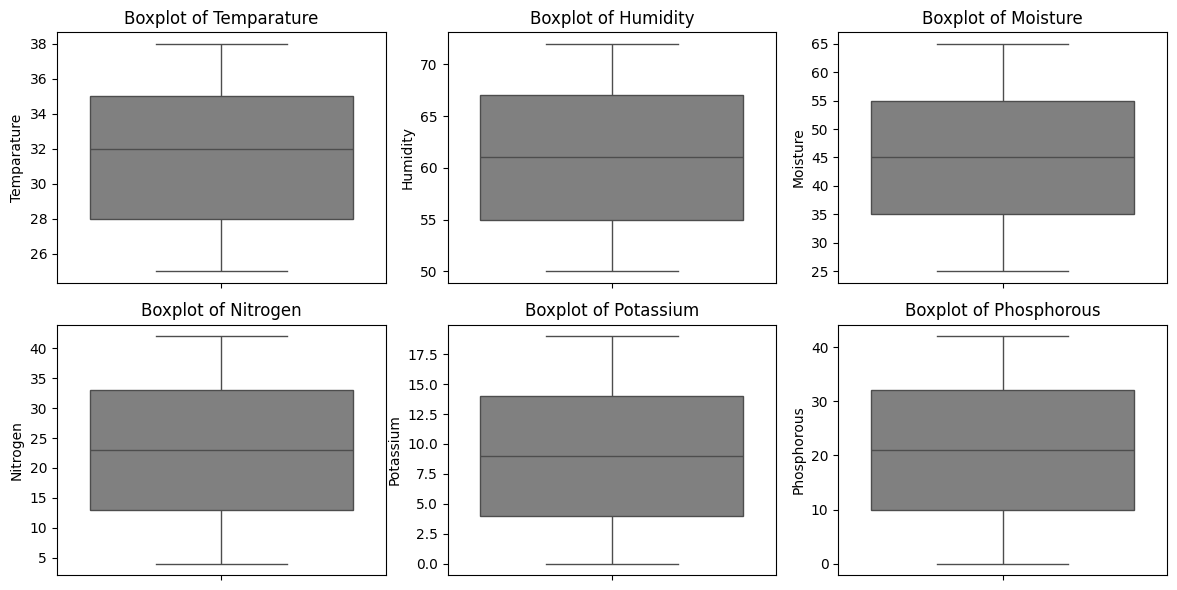

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_fertilizer[col], color="gray")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [ ]:
# Sélectionner les colonnes catégorielles
categorical_cols = data_fertilizer.select_dtypes(include=['object']).columns

# Afficher les classes et leur nombre pour chaque colonne catégorielle
for col in categorical_cols:
    print(f"\nDistribution pour la colonne '{col}':")
    class_counts = data_fertilizer[col].value_counts()

    # Afficher chaque classe et son nombre
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")



Distribution pour la colonne 'Soil Type':
Black: 20100
Sandy: 20064
Loamy: 19999
Clayey: 19920
Red: 19917

Distribution pour la colonne 'Crop Type':
Sugarcane: 9267
Cotton: 9237
Tobacco: 9224
Millets: 9154
Paddy: 9103
Oil seeds: 9096
Pulses: 9072
Barley: 9041
Maize: 9013
Wheat: 8912
Ground Nuts: 8881

Distribution pour la colonne 'Fertilizer Name':
14-35-14: 14492
10/26/2026: 14378
Urea: 14325
28-28: 14232
DAP: 14220
20-20: 14181
17-17-17: 14172


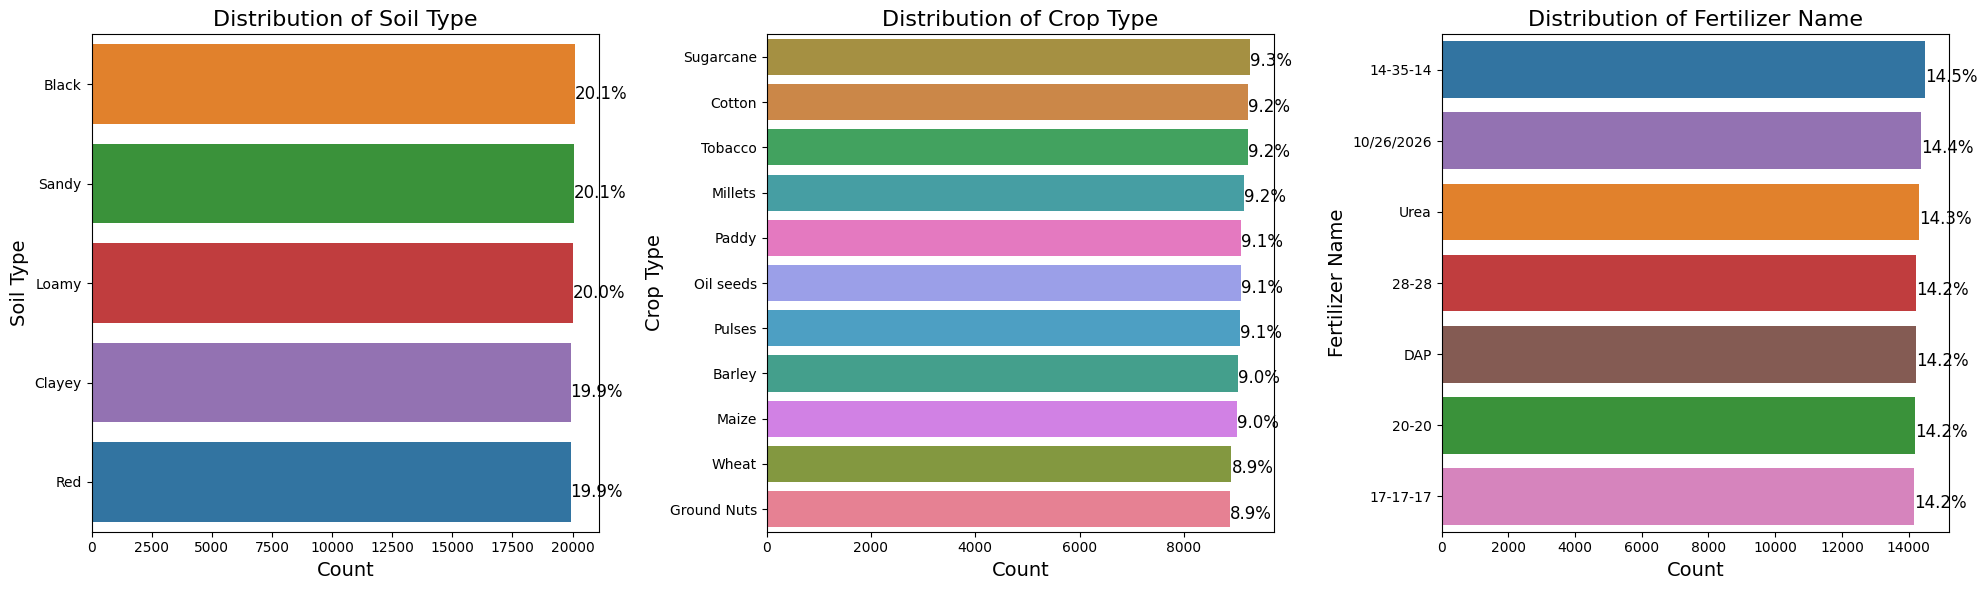

In [ ]:


# Select categorical columns
categorical_cols = data_fertilizer.select_dtypes(include=['object']).columns

# Calculate rows & columns dynamically for subplots
num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 3)  # Adjust row count dynamically

# Increase figure size for bigger graphs
plt.figure(figsize=(20, num_rows * 6))  # Set larger width and height

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 3, i)

    # Fixing the FutureWarning by using hue and removing palette argument in the countplot
    ax = sns.countplot(y=data_fertilizer[col], order=data_fertilizer[col].value_counts().index, hue=data_fertilizer[col], legend=False)

    # Add percentage labels
    total = len(data_fertilizer[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        ax.annotate(percentage, (p.get_width(), p.get_y() + 0.5), fontsize=12, ha='left', va='center')

    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()
plt.show()


Encodage

In [ ]:
# Define the encoding map for each column
soil_type_map = {
    'Black': 0,
    'Sandy': 1,
    'Loamy': 2,
    'Clayey': 3,
    'Red': 4
}

crop_type_map = {
    'Sugarcane': 0,
    'Cotton': 1,
    'Tobacco': 2,
    'Millets': 3,
    'Paddy': 4,
    'Oil seeds': 5,
    'Pulses': 6,
    'Barley': 7,
    'Maize': 8,
    'Wheat': 9,
    'Ground Nuts': 10
}

fertilizer_name_map = {
    '14-35-14': 0,
    '10/26/2026': 1,
    'Urea': 2,
    '28-28': 3,
    'DAP': 4,
    '20-20': 5,
    '17-17-17': 6
}

# Apply the mappings to the columns
data_fertilizer['Soil Type'] = data_fertilizer['Soil Type'].map(soil_type_map)
data_fertilizer['Crop Type'] = data_fertilizer['Crop Type'].map(crop_type_map)
data_fertilizer['Fertilizer Name'] = data_fertilizer['Fertilizer Name'].map(fertilizer_name_map)

# Display the result
print(data_fertilizer[['Soil Type', 'Crop Type', 'Fertilizer Name']].head())


   Soil Type  Crop Type  Fertilizer Name
0          4         10                0
1          0          1                2
2          1          0                5
3          2         10                3
4          4         10                0


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Appliquer la normalisation aux colonnes que vous souhaitez
data_fertilizer[['Soil Type', 'Crop Type', 'Fertilizer Name']] = scaler.fit_transform(
    data_fertilizer[['Soil Type', 'Crop Type', 'Fertilizer Name']]
)

# Afficher les résultats normalisés
print(data_fertilizer[['Soil Type', 'Crop Type', 'Fertilizer Name']].head())


   Soil Type  Crop Type  Fertilizer Name
0       1.00        1.0         0.000000
1       0.00        0.1         0.333333
2       0.25        0.0         0.833333
3       0.50        1.0         0.500000
4       1.00        1.0         0.000000
